In [1]:
import pysubgroup as ps
import pandas as pd

In [2]:
data = pd.read_csv("../Datasets/adult_test.csv", index_col=0)
# print(data['target'].unique())
target = ps.NominalTarget('target', ' >50K.')
searchSpace = ps.create_selectors(data, ignore=['target'], nbins=5)
task = ps.SubgroupDiscoveryTask (data, target, searchSpace, depth=5, qf=ps.ChiSquaredQF())

In [3]:
result = ps.BeamSearch().execute(task)
for (q, sg) in result:
    print (str(q) + ":\t" + str(sg.subgroup_description))

3269.785010814037:	marital-status= Married-civ-spouse
3232.177110805106:	marital-status= Married-civ-spouse AND education-num>=13
2991.600782307297:	marital-status= Married-civ-spouse AND native-country= United-States
2967.0188969073797:	marital-status= Married-civ-spouse AND native-country= United-States AND education-num>=13
2940.0204002325017:	marital-status= Married-civ-spouse AND race= White AND education-num>=13
2871.9481212514384:	marital-status= Married-civ-spouse AND race= White
2798.9193751550742:	sex= Male AND marital-status= Married-civ-spouse AND education-num>=13
2794.2937880586874:	marital-status= Married-civ-spouse AND race= White AND education-num>=13 AND native-country= United-States
2788.8623089573643:	relationship= Husband AND education-num>=13
2788.8623089573643:	sex= Male AND relationship= Husband AND education-num>=13


In [4]:
ps.resultsAsDataFrame(data, result)

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,3269.785011,marital-status= Married-civ-spouse,7403.0,16281.0,3292.0,3846.0,8878.0,0.454702,0.545298,0.855954,0.144046,0.444685,0.062401,0.236226,1.882452
1,3232.177111,marital-status= Married-civ-spouse AND educati...,2193.0,16281.0,1570.0,3846.0,14088.0,0.134697,0.865303,0.408216,0.591784,0.715914,0.161556,0.236226,3.030629
2,2991.600782,marital-status= Married-civ-spouse AND native-...,6635.0,16281.0,3024.0,3846.0,9646.0,0.407530,0.592470,0.786271,0.213729,0.455765,0.085217,0.236226,1.929357
3,2967.018897,marital-status= Married-civ-spouse AND native-...,1954.0,16281.0,1421.0,3846.0,14327.0,0.120017,0.879983,0.369475,0.630525,0.727226,0.169261,0.236226,3.078515
4,2940.020400,marital-status= Married-civ-spouse AND race= W...,1975.0,16281.0,1426.0,3846.0,14306.0,0.121307,0.878693,0.370775,0.629225,0.722025,0.169160,0.236226,3.056499
5,2871.948121,marital-status= Married-civ-spouse AND race= W...,6644.0,16281.0,2997.0,3846.0,9637.0,0.408083,0.591917,0.779251,0.220749,0.451084,0.088098,0.236226,1.909541
6,2798.919375,sex= Male AND marital-status= Married-civ-spou...,1944.0,16281.0,1389.0,3846.0,14337.0,0.119403,0.880597,0.361154,0.638846,0.714506,0.171375,0.236226,3.024668
7,2794.293788,marital-status= Married-civ-spouse AND race= W...,1845.0,16281.0,1344.0,3846.0,14436.0,0.113322,0.886678,0.349454,0.650546,0.728455,0.173317,0.236226,3.083718
8,2788.862309,relationship= Husband AND education-num>=13,1941.0,16281.0,1386.0,3846.0,14340.0,0.119219,0.880781,0.360374,0.639626,0.714065,0.171548,0.236226,3.022801
9,2788.862309,sex= Male AND relationship= Husband AND educat...,1941.0,16281.0,1386.0,3846.0,14340.0,0.119219,0.880781,0.360374,0.639626,0.714065,0.171548,0.236226,3.022801


In [5]:
%time res = ps.BSD().execute(task)
res

KeyboardInterrupt: 

In [6]:
%time res = ps.BeamSearch().execute(task)
res

CPU times: user 31.8 s, sys: 97.6 ms, total: 31.9 s
Wall time: 31.9 s


[(3269.785010814037,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse>>),
 (3232.177110805106,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND education-num>=13>>),
 (2991.600782307297,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND native-country= United-States>>),
 (2967.0188969073797,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND native-country= United-States AND education-num>=13>>),
 (2940.0204002325017,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND race= White AND education-num>=13>>),
 (2871.9481212514384,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND race= White>>),
 (2798.9193751550742,
  <<T: target= >50K.; D: sex= Male AND marital-status= Married-civ-spouse AND education-num>=13>>),
 (2794.2937880586874,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND race= White AND education-num>=13 AND native-country= United-States>>),
 (2788.8623089573643,
  <<T: target= >50K

In [7]:
df = ps.as_df(data, res)
df

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,3269.785011,marital-status= Married-civ-spouse,7403.0,16281.0,3292.0,3846.0,8878.0,0.454702,0.545298,0.855954,0.144046,0.444685,0.062401,0.236226,1.882452
1,3232.177111,marital-status= Married-civ-spouse AND educati...,2193.0,16281.0,1570.0,3846.0,14088.0,0.134697,0.865303,0.408216,0.591784,0.715914,0.161556,0.236226,3.030629
2,2991.600782,marital-status= Married-civ-spouse AND native-...,6635.0,16281.0,3024.0,3846.0,9646.0,0.407530,0.592470,0.786271,0.213729,0.455765,0.085217,0.236226,1.929357
3,2967.018897,marital-status= Married-civ-spouse AND native-...,1954.0,16281.0,1421.0,3846.0,14327.0,0.120017,0.879983,0.369475,0.630525,0.727226,0.169261,0.236226,3.078515
4,2940.020400,marital-status= Married-civ-spouse AND race= W...,1975.0,16281.0,1426.0,3846.0,14306.0,0.121307,0.878693,0.370775,0.629225,0.722025,0.169160,0.236226,3.056499
5,2871.948121,marital-status= Married-civ-spouse AND race= W...,6644.0,16281.0,2997.0,3846.0,9637.0,0.408083,0.591917,0.779251,0.220749,0.451084,0.088098,0.236226,1.909541
6,2798.919375,sex= Male AND marital-status= Married-civ-spou...,1944.0,16281.0,1389.0,3846.0,14337.0,0.119403,0.880597,0.361154,0.638846,0.714506,0.171375,0.236226,3.024668
7,2794.293788,marital-status= Married-civ-spouse AND race= W...,1845.0,16281.0,1344.0,3846.0,14436.0,0.113322,0.886678,0.349454,0.650546,0.728455,0.173317,0.236226,3.083718
8,2788.862309,relationship= Husband AND education-num>=13,1941.0,16281.0,1386.0,3846.0,14340.0,0.119219,0.880781,0.360374,0.639626,0.714065,0.171548,0.236226,3.022801
9,2788.862309,sex= Male AND relationship= Husband AND educat...,1941.0,16281.0,1386.0,3846.0,14340.0,0.119219,0.880781,0.360374,0.639626,0.714065,0.171548,0.236226,3.022801


In [8]:
print (ps.to_latex(data, res, ['subgroup','size_sg', 'size_dataset', 'positives_sg']))

\begin{tabular}{lrrr}
\toprule
                                          subgroup &    size\_sg & size\_dataset & positives\_sg \\
\midrule
                marital-status= Married-civ-spouse &       7403 &        16281 &         3292 \\
 marital-status= Married-civ-spouse $\wedge$ educati... &       2193 &        16281 &         1570 \\
 marital-status= Married-civ-spouse $\wedge$ native-... &       6635 &        16281 &         3024 \\
 marital-status= Married-civ-spouse $\wedge$ native-... &       1954 &        16281 &         1421 \\
 marital-status= Married-civ-spouse $\wedge$ race= W... &       1975 &        16281 &         1426 \\
 marital-status= Married-civ-spouse $\wedge$ race= W... &       6644 &        16281 &         2997 \\
 sex= Male $\wedge$ marital-status= Married-civ-spou... &       1944 &        16281 &         1389 \\
 marital-status= Married-civ-spouse $\wedge$ race= W... &       1845 &        16281 &         1344 \\
       relationship= Husband $\wedge$ education-n

In [9]:
df = ps.as_df(data, res)
df

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,3269.785011,marital-status= Married-civ-spouse,7403.0,16281.0,3292.0,3846.0,8878.0,0.454702,0.545298,0.855954,0.144046,0.444685,0.062401,0.236226,1.882452
1,3232.177111,marital-status= Married-civ-spouse AND educati...,2193.0,16281.0,1570.0,3846.0,14088.0,0.134697,0.865303,0.408216,0.591784,0.715914,0.161556,0.236226,3.030629
2,2991.600782,marital-status= Married-civ-spouse AND native-...,6635.0,16281.0,3024.0,3846.0,9646.0,0.407530,0.592470,0.786271,0.213729,0.455765,0.085217,0.236226,1.929357
3,2967.018897,marital-status= Married-civ-spouse AND native-...,1954.0,16281.0,1421.0,3846.0,14327.0,0.120017,0.879983,0.369475,0.630525,0.727226,0.169261,0.236226,3.078515
4,2940.020400,marital-status= Married-civ-spouse AND race= W...,1975.0,16281.0,1426.0,3846.0,14306.0,0.121307,0.878693,0.370775,0.629225,0.722025,0.169160,0.236226,3.056499
5,2871.948121,marital-status= Married-civ-spouse AND race= W...,6644.0,16281.0,2997.0,3846.0,9637.0,0.408083,0.591917,0.779251,0.220749,0.451084,0.088098,0.236226,1.909541
6,2798.919375,sex= Male AND marital-status= Married-civ-spou...,1944.0,16281.0,1389.0,3846.0,14337.0,0.119403,0.880597,0.361154,0.638846,0.714506,0.171375,0.236226,3.024668
7,2794.293788,marital-status= Married-civ-spouse AND race= W...,1845.0,16281.0,1344.0,3846.0,14436.0,0.113322,0.886678,0.349454,0.650546,0.728455,0.173317,0.236226,3.083718
8,2788.862309,relationship= Husband AND education-num>=13,1941.0,16281.0,1386.0,3846.0,14340.0,0.119219,0.880781,0.360374,0.639626,0.714065,0.171548,0.236226,3.022801
9,2788.862309,sex= Male AND relationship= Husband AND educat...,1941.0,16281.0,1386.0,3846.0,14340.0,0.119219,0.880781,0.360374,0.639626,0.714065,0.171548,0.236226,3.022801


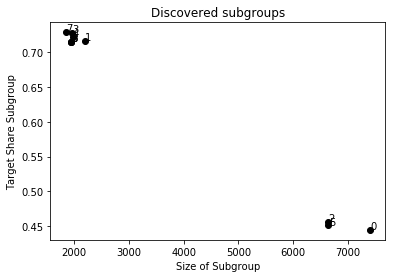

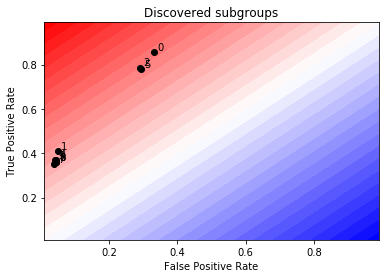

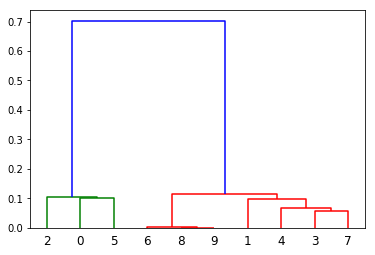

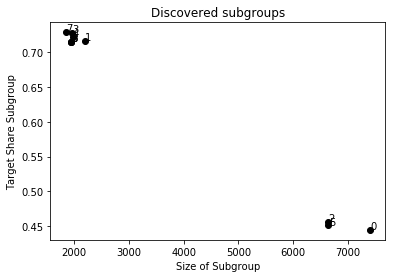

In [10]:
ps.plot_roc(df, data, ps.StandardQF(1), annotate=True)

ps.similarity_sgs(res, data)

ps.similarity_dendrogram(res, data)

ps.plot_npspace(df, data, fixed_limits=False)

In [11]:
res

[(3269.785010814037,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse>>),
 (3232.177110805106,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND education-num>=13>>),
 (2991.600782307297,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND native-country= United-States>>),
 (2967.0188969073797,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND native-country= United-States AND education-num>=13>>),
 (2940.0204002325017,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND race= White AND education-num>=13>>),
 (2871.9481212514384,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND race= White>>),
 (2798.9193751550742,
  <<T: target= >50K.; D: sex= Male AND marital-status= Married-civ-spouse AND education-num>=13>>),
 (2794.2937880586874,
  <<T: target= >50K.; D: marital-status= Married-civ-spouse AND race= White AND education-num>=13 AND native-country= United-States>>),
 (2788.8623089573643,
  <<T: target= >50K